In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

X_train = X_train/255
X_test =  X_test/255

X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

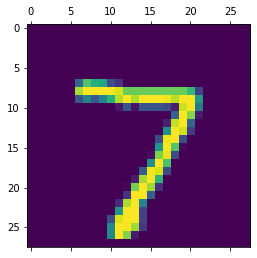

In [20]:
plt.matshow(X_test[0])

In [21]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)
#creating the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])

model.compile( 
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

model.fit(X_train_flatten,y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4876 - accuracy: 0.8776
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3064 - accuracy: 0.9160
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2853 - accuracy: 0.9212
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2749 - accuracy: 0.9238
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2675 - accuracy: 0.9263
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2628 - accuracy: 0.9279
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2586 - accuracy: 0.9286
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2558 - accuracy: 0.9296
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2527 - accuracy: 0.9302
Epoch 10/10
60

In [23]:
model.evaluate(X_test_flatten, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.2619 - accuracy: 0.9276


[0.26188701437711714, 0.9276]

1

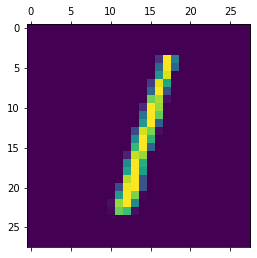

In [29]:
plt.matshow(X_test[2])

y_pred = model.predict(X_test_flatten)
y_pred[2]

np.argmax(y_pred[2])

In [32]:
#showing the confusion matrix
y_pred_labels = [np.argmax(i) for i in y_pred ]

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  938,   15,    9,    4,   12,    9,   27,    3],
       [   4,    0,   19,  925,    0,   21,    3,   12,   18,    8],
       [   1,    2,    5,    0,  914,    0,   10,    4,    8,   38],
       [  10,    3,    3,   36,   10,  778,   15,    7,   25,    5],
       [  12,    3,    5,    1,    7,    9,  918,    2,    1,    0],
       [   2,    7,   25,    5,    7,    1,    0,  946,    1,   34],
       [  10,   13,    6,   25,    9,   32,   10,   10,  847,   12],
       [  11,    8,    1,   12,   20,    6,    0,   20,    4,  927]])>

In [33]:
#using multiple hidden layers
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile( 
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

model.fit(X_train_flatten,y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2963 - accuracy: 0.9177
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1383 - accuracy: 0.9593
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1000 - accuracy: 0.9707
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0794 - accuracy: 0.9754
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0635 - accuracy: 0.9805
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0541 - accuracy: 0.9832
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0446 - accuracy: 0.9865
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0377 - accuracy: 0.9883
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0332 - accuracy: 0.9899
Epoch 10/10
60

In [34]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  938,   15,    9,    4,   12,    9,   27,    3],
       [   4,    0,   19,  925,    0,   21,    3,   12,   18,    8],
       [   1,    2,    5,    0,  914,    0,   10,    4,    8,   38],
       [  10,    3,    3,   36,   10,  778,   15,    7,   25,    5],
       [  12,    3,    5,    1,    7,    9,  918,    2,    1,    0],
       [   2,    7,   25,    5,    7,    1,    0,  946,    1,   34],
       [  10,   13,    6,   25,    9,   32,   10,   10,  847,   12],
       [  11,    8,    1,   12,   20,    6,    0,   20,    4,  927]])>

In [40]:

#using flatten of keras 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile( 
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

model.fit(X_train,y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2883 - accuracy: 0.9194s - loss: 0.2956 - accuracy
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1311 - accuracy: 0.9618
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0914 - accuracy: 0.9725
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0708 - accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0567 - accuracy: 0.9828
Epoch 6/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0478 - accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0387 - accuracy: 0.9880
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0333 - accuracy: 0.9900
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0272 - accu